In [1]:
from importlib.machinery import SourceFileLoader
import pdb
import matplotlib.pyplot as plt
from time import sleep
from tqdm.notebook import tqdm_notebook
import numpy as np
from copy import copy

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
N = 10

# Comienzo a hacer los cambios

In [4]:
steps = int(1e5)
KT = np.hstack([ 2+np.logspace(-2, np.log10(2), 20) , 2-np.logspace(-2, np.log10(2),20)])
KT = KT[KT>0]
KT.sort()
KT = KT[::-1]
beta = 1/KT

In [5]:
changes = np.random.randint(N, size=(steps, 2, len(beta)))

In [6]:
coins = np.random.rand(steps, len(beta))

In [48]:
S = []
acumM = []
acumE = []
Mhist = []
Ehist = []
flips = []
metroflips = []
boltsfactors = []

progress = tqdm_notebook(enumerate(beta), ncols = 700, total=len(beta))
for t, Beta in progress:
    if len(S) > 0:
        S.append(copy(S[-1]))
    else:
        S.append( np.random.randint(2, size=(N,N))*2-1)
        
    E = [
        -0.5* S[-1]*(
                np.roll(S, 1, 0)+
                np.roll(S[-1], -1, 0)+
                np.roll(S[-1], 1, 1)+
                np.roll(S[-1], -1, 1)
        ).sum()]
    M = [S[-1].sum()/N**2]
    Macum = np.abs(M); Eacum = sum(E)
    progress.set_description(f'Beta = {Beta}')
    flips.append(0)
    metroflips.append(0)
    boltsfactors.append([])
    
    
    for i, change in enumerate(changes[:,:,t]):
#        Saux = S[-1].copy()
#        NEIG = np.roll(Saux, 1, 0)+np.roll(Saux, -1, 0) + np.roll(Saux, 1, 1) + np.roll(Saux, -1, 1) 
        NEIG = S[-1][change[0]-N,change[1]]+S[-1][change[0]-1, change[1]] +\
               S[-1][change[0],change[1]-N] + S[-1][change[0],change[1]-1] 
        Saux = -copy(S[-1][change[0],change[1]])
#        DE_candidate = -2*S[-1][change[0],change[1]]*NEIG
        DE_candidate = -2*Saux*NEIG
        boltsfactors[-1].append(np.exp(-Beta*DE_candidate))
        if (DE_candidate < 0): 
            S[-1][change[0],change[1]] = Saux# copy(Saux)
            DE = copy(DE_candidate)
            flips[-1] += 1
        elif coins[i, t] < boltsfactors[-1][-1]:
            S[-1][change[0],change[1]] = copy(Saux) #-1# copy(Saux)
            DE = copy(DE_candidate)
            metroflips[-1] += 1
        else: 
            DE = 0
        M.append(M[-1]+2*S[-1][change[0],change[1]]/N**2)
        E.append(E[-1]+DE)
        Macum += np.abs(M[-1])
        Eacum += E[-1]
    Mhist.append(M)
    Ehist.append(M)
    acumM.append(Macum/changes.shape[0])
    acumE.append(Eacum/changes.shape[0])
    

  0%|                                                                                                         …

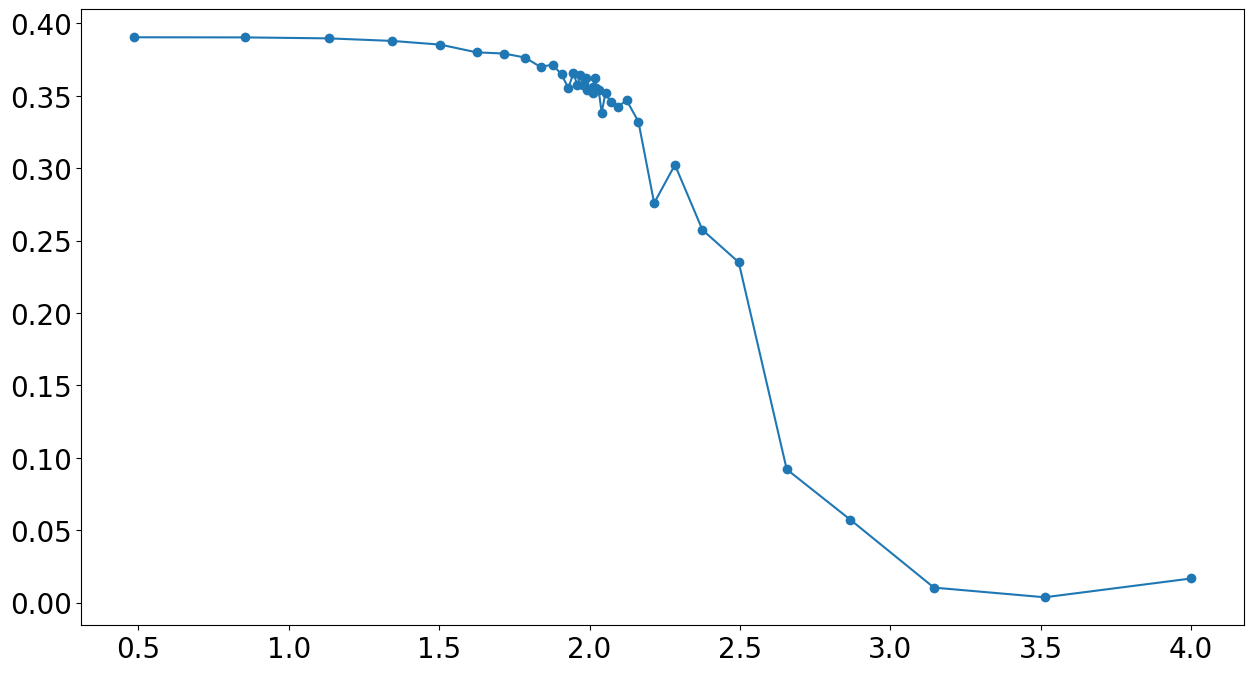

In [49]:
plt.plot(KT,np.array(acumM)*changes.shape[2]/changes.shape[0],'o-')

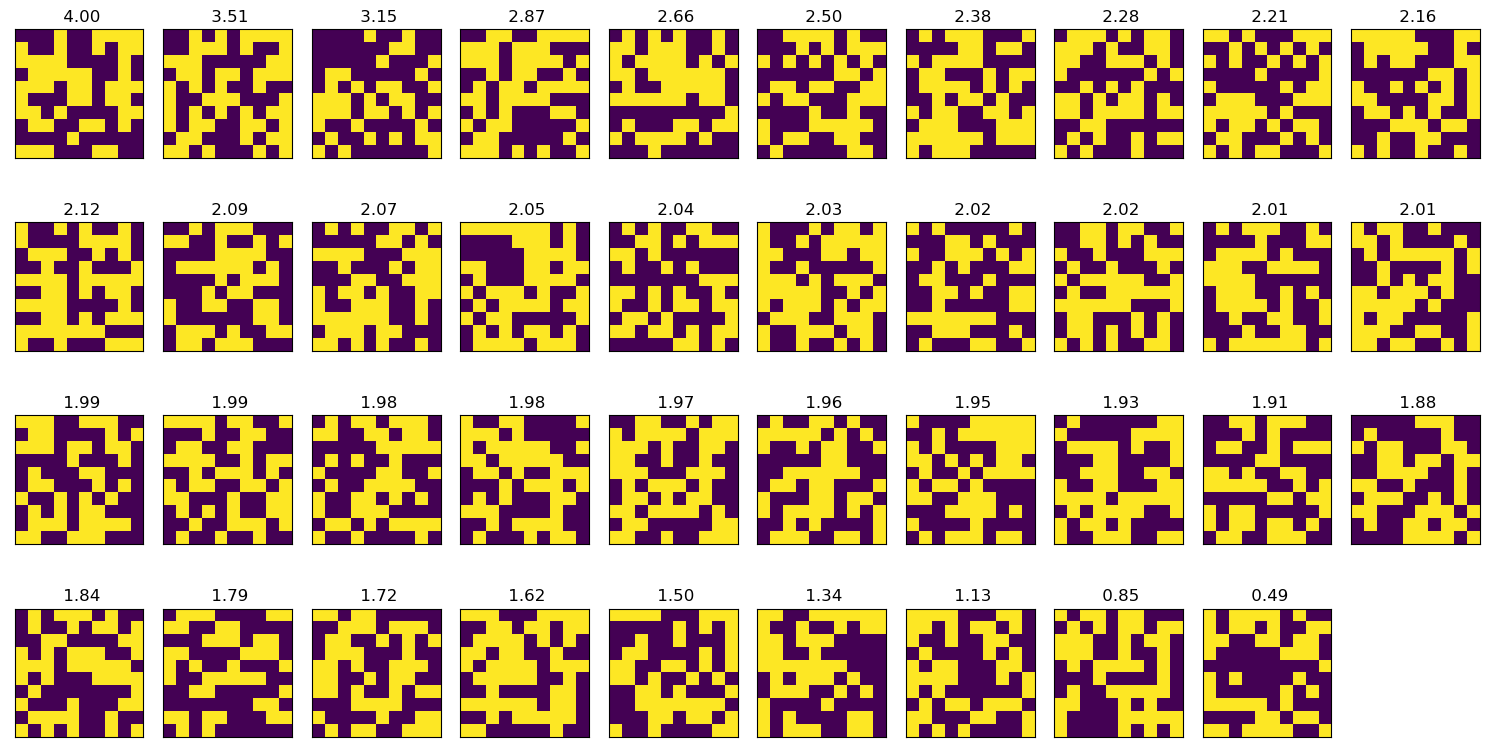

In [37]:
fig = plt.figure()
for i in range(len(S)):
    ax = fig.add_subplot(4, int(len(S)/4)+1, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(S[i])
    ax.set_title(' {:4.2f}'.format(KT[i]))
fig.tight_layout()

In [39]:
changes.shape

(100000, 2, 39)

In [40]:
KT

array([4.        , 3.51329346, 3.14502854, 2.8663821 , 2.65554518,
       2.49601611, 2.37530897, 2.2839763 , 2.21486974, 2.16258049,
       2.12301599, 2.09307965, 2.07042841, 2.05328943, 2.04032127,
       2.03050896, 2.0230845 , 2.01746681, 2.01321621, 2.01      ,
       1.99      , 1.98678379, 1.98253319, 1.9769155 , 1.96949104,
       1.95967873, 1.94671057, 1.92957159, 1.90692035, 1.87698401,
       1.83741951, 1.78513026, 1.7160237 , 1.62469103, 1.50398389,
       1.34445482, 1.1336179 , 0.85497146, 0.48670654])

In [41]:
np.shape(Ehist)

(39, 100001)

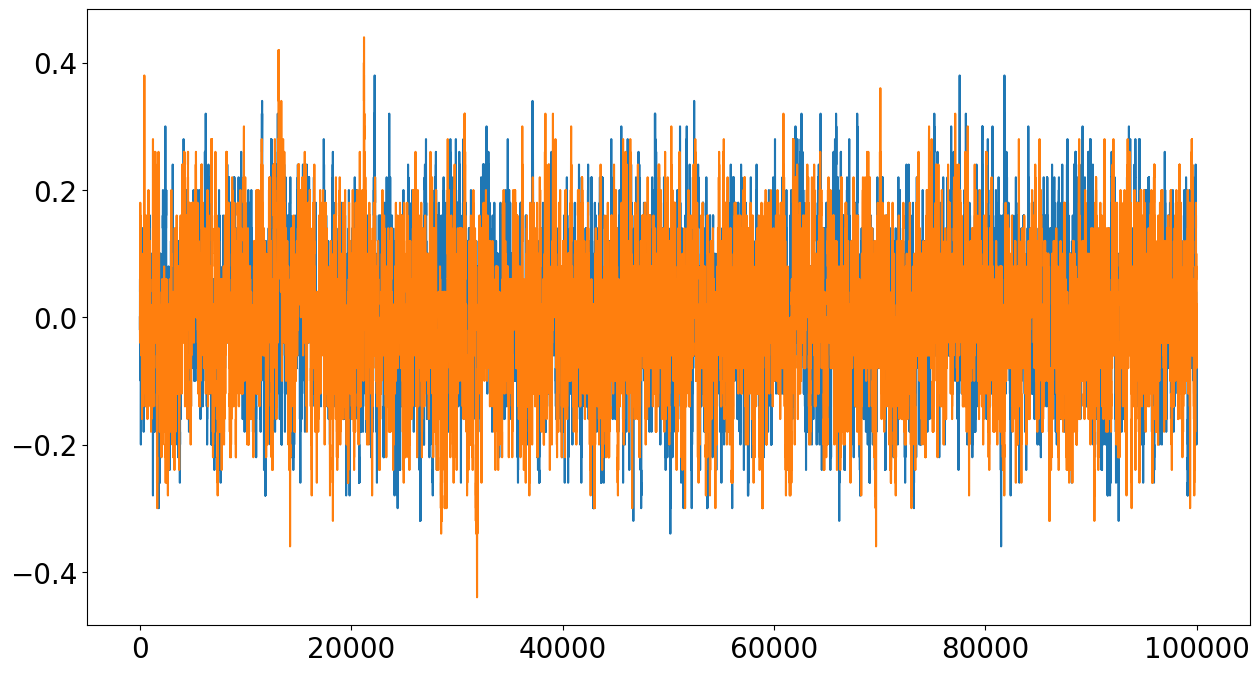

In [42]:
plt.plot(Ehist[-1])
plt.plot(Ehist[0])

In [43]:
metroflips

[25260,
 25021,
 25121,
 24974,
 25063,
 24757,
 25360,
 24917,
 25167,
 24969,
 24933,
 24878,
 25111,
 24809,
 24916,
 25154,
 24894,
 25106,
 24881,
 24890,
 24875,
 25141,
 24851,
 25020,
 24992,
 25165,
 25147,
 24975,
 25100,
 25108,
 25073,
 25065,
 25300,
 25045,
 25058,
 25025,
 25116,
 25129,
 24982]

In [45]:
np.shape(boltsfactors)

(39, 100000)

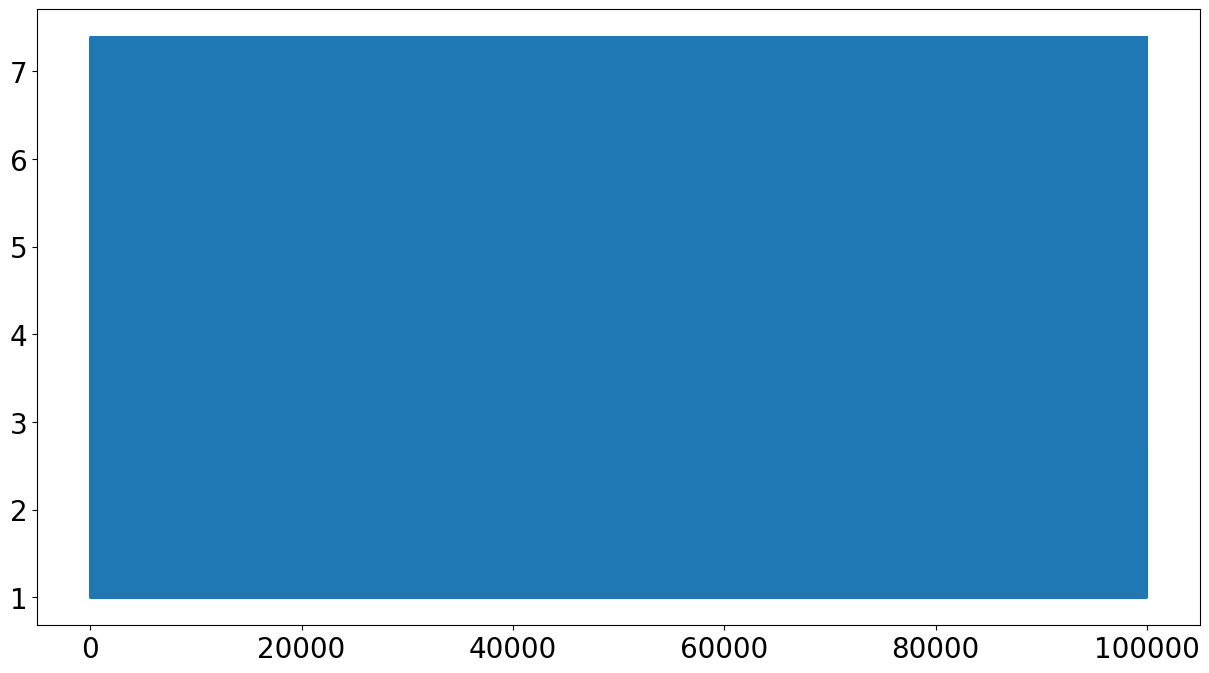

In [47]:
plt.plot(boltsfactors[0])